# Working with rasters

This is the notebook to start with in this repository.  After this notebook move on to any of the notebooks in this folder.

### Table of Contents
* 🧠Anatomy of a raster
* 📖Opening a file
* 🔍Inspecting the metadata
* 🚜Working with the data
* 💾Saving a file

### Installing and Importing Packages

In [1]:
!pip install rasterio numpy scipy -q

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# These are all the imports that are used in this notebook
# Each import is also present a second time, right before the library is used for the first time
import rasterio
import numpy as np
from scipy import stats
from rasterio.plot import show

## 🧠 The Anatomy of a raster

Working with raster data involves understanding how rasters are organized.

<img src="../images/Raster Anatomy.jpg" width="550">

## 📖 Opening a file

When you open data files in Python you usually need to use a library.  When dealing with raster data there are several common libraries, most of which cater to a specific data type:

  
|  File Format |  File Extension | Python Library  |
|---|---|---|
|  netCDF |  `.nc` | netCDF4  |
|  HDF5 | `.hdf5`  | h5py  |
| HDF4 | `.hdf4` | pyhdf |
| geoTIFF | `.tiff` | rasterio |
| zarr | `.zarr` | zarr |


While each of these libraries works best with their associated file type, I really like to use `rasterio` because it does a particularly good job of accomodating [many data types](https://gdal.org/drivers/raster/index.html).  Rasterio has the ability to open all of the above filetypes but, with the exception of tiff files, it isn't as optimized for each particular file type as the speciality libraries.

### Opening a file with `rasterio`:

We open our rasters with the `rasterio.open()` method.  The general syntax is 
> ```python
> with rasterio.open(`FILEPATH_TO_RASTER`, `DATAMODE`) as src:
    print(src)
> ```

where `FILEPATH_TO_RASTER` is the place on your computer where `DATAMODE` is usually either 'r' for read (opening existing data) or 'w' for write (creating new data).  There are other data modes but these are the ones we will use for now.

An example using test AVIRIS data:

In [3]:
# Define the filepath to our raster
filepath_h2o = '../input_data/f150131t01p00r10_refl/f150131t01p00r10_h2o_v1'
filepath_img = '../input_data/f170508t01p00r11rdn_e/f170508t01p00r11rdn_e_sc01_ort_img'

In [4]:
import rasterio

In [5]:
# Open the file
with rasterio.open(filepath_h2o, 'r') as src:
    print(src)

<open DatasetReader name='../input_data/f150131t01p00r10_refl/f150131t01p00r10_h2o_v1' mode='r'>


The object that gets returned here `<open DatasetReader name='f150131t01p00r10_refl/f150131t01p00r10_h2o_v1' mode='r'>` is the "Dataset Reader" object.  This object connects you to the file in Python, but it isn't actually the data.  To get to the data you need to use `src.read()`.

### Reading a raster band with `rasterio`:

General syntax:

> ```python
> with rasterio.open(FILEPATH_TO_RASTER, DATAMODE) as src:
    print(src.read(BAND_INDEX))
> ```

where `FILEPATH_TO_RASTER` is the place on your computer where the data is `DATAMODE` is usually either 'r' for read (opening existing data) or 'w' for write (creating new data).  There are other data modes but these are the ones we will use for now. `BAND_INDEX` indicates which band you want to read.  Leaving `BAND_INDEX` blank reads the entire raster (all bands).

An example:

In [6]:
with rasterio.open(filepath_h2o, 'r') as src:
    print(src.read(1))

[[15536 15536 15536 ... 15536 15536 15536]
 [15536 15536 15536 ... 15536 15536 15536]
 [15536 15536 15536 ... 15536 15536 15536]
 ...
 [15536 15536 15536 ... 15536 15536 15536]
 [15536 15536 15536 ... 15536 15536 15536]
 [15536 15536 15536 ... 15536 15536 15536]]


What gets printed here are our actual data values! 🎉

### Getting a quick visual of the data

Another way to quickly get eyes on our data is to use the `show` command.

In [7]:
import rasterio.plot as rplot

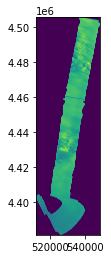

In [8]:
with rasterio.open(filepath_img, 'r') as src:
    rplot.show(src)

The plot and the array might not be very useful right now, but at least we have validated that we can open our raster and that it contains data.

### Extra background - Context managers

It might be new to you that I used the syntax:
```python
with ... as src:
    src.read()
```

This syntax is called the **Context manager**.  When we read files we are opening them up, like a book, and they stay open until we tell the program to close them.  The benefit of the context manager is that it opens up a file when you use the `with` statement, runs all your lines of indented code, and the closes the file after.  This is important if you are opening up large files.  Your computer only has so much memory, so if you try to open too many 8GB files at once without closing them you can crash your program.

If you don't want to use the contect manager another way to this same task is to run:

In [9]:
src = rasterio.open(filepath_img, 'r')
src.read(1)
print(src)
src.close()

<open DatasetReader name='../input_data/f170508t01p00r11rdn_e/f170508t01p00r11rdn_e_sc01_ort_img' mode='r'>


If you do this, though, make sure to only be working with a few files at a time or to close your files.

## 🔍 Inspecting the Metadata

When you first open a dataset it is often helpful to get your bearings by inspecting the metadata.  In rasterio we do this by inspecting the DatasetReader object (`src`) that was returned when you opened the object.

There are [lots of attributes](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#rasterio._base.DatasetBase) that you check a dataset reader for.  If you want to get an general overview I like to use `src.meta`.  To extract specific values here are some more attributes that I find useful:
* [`src.bounds`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id1) - Returns the lower left and upper right bounds of the dataset in the units of its coordinate reference system. (lower left x, lower left y, upper right x, upper right y)
* [`src.count`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id5) - The number of raster bands in the dataset
* [`src.crs`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id6) - The dataset’s coordinate reference system
* [`src.descriptions`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id7) - Descriptions for each dataset band
* [`src.dtypes`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#rasterio._base.DatasetBase.dtypes) - The data types of each band in index order
* `src.height` - The number of pixels in each column
* [`src.indexes`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id11) - The 1-based indexes of each band in the dataset
* [`src.meta`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id14) - The basic metadata of this dataset.
* `src.name` - Relative filepath of the dataset
* [`src.nodata`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id17) - The dataset’s single nodata value
* [`src.res`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id22) - Returns the (width, height) of pixels in the units of its coordinate reference system.
* [`src.transform`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id24) - The dataset’s georeferencing transformation matrix
* [`src.units`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id25) - one units string for each dataset band
* `src.width` - the number of pixels in each row

All of the parts of the raster that were addressed in the first section of this notebook  _Anatomy of a raster_ are accessible using these attributes.

### Example

In [10]:
from pprint import pprint

In [11]:
# Try substituting any of the above attributes in for this dataset
with rasterio.open(filepath_img, 'r') as src:
    print('src.meta - ')
    pprint(src.meta)
    print('src.name - ', src.name)

src.meta - 
{'count': 224,
 'crs': CRS.from_epsg(32613),
 'driver': 'ENVI',
 'dtype': 'int16',
 'height': 8068,
 'nodata': None,
 'transform': Affine(15.4, -0.0, 512070.11,
       -0.0, -15.4, 4505618.4),
 'width': 2352}
src.name -  ../input_data/f170508t01p00r11rdn_e/f170508t01p00r11rdn_e_sc01_ort_img


With the above print statement we learned from the `src.meta` information that the raster has 224 bands (`count`) it has the coordinate reference system EPSG code 32613 (`crs`), it is an ENVI filetype (`driver`), the datatype is int16 (`dtype`), it has 8068 rows or is 8068 pixels tall (`height`), there isn't a nodata value set (`nodata`), the affine tranform is (15.4, -0.0, 512070.11, -0.0, -15.4, 4505618.4) (`tranform`), and that the raster has 2352 columns or is 2352 pixels wide.  We also see the relative filepath of the raster from the `src.name` attribute.

### Bounding Boxes

A bounding box is a pretty important concept in a raster dataset.  It represents the minimum and maxiumum coordinates of the dataset.  These are often latitude and longitude lines, but the bounding box is given the units of whatever dataset the raster is using.  Since AVIRIS data uses a UTM grid (projected CRS) meters or km is the units of the bounding box.

<img src="../images/Bounding box.png" width="550">

In this example the outline of Italy is shown in red and the bounding box for Italy, which follows the minimum and maximum latitude and longitude lines, is shown in black.

We access the bounds of the dataset using:

In [12]:
with rasterio.open(filepath_img, 'r') as src:
    print(src.bounds)

BoundingBox(left=512070.11, bottom=4381371.2, right=548290.91, top=4505618.4)


Notice that you can also assign the bounds shape to a python variable and pull the left, right, top or bottom elements out by name.

In [13]:
with rasterio.open(filepath_img, 'r') as src:
    bbox = src.bounds
print(bbox.left)

512070.11


If you aren't familiar with the UTM coordinate system those numbers probably don't mean a lot.  Coordinate Reference Systems are discussed in a notebook in the `Additional Notebooks` section and we will reference the bbox again there.

## 🚜 Working with the Data

While the raster file is is accessed through a unique filetype-specific library, the actual data is almost always just a common matrix datatype.  Numpy is the most common type of object, but xarray is also used by some data libraries.

A reminder about matrix indexing:
* 2D matrices use row, column order
* 3D matrices use height, row, column order

### Exploratory statistics

When I open a dataset I often like to get a sense of it by just looking at looking at statistics for one of the bands.

In [14]:
# Read out a band
with rasterio.open(filepath_h2o, 'r') as src:
    band1 = src.read(1)

# Print the overview statistics
print('max value: ', band1.max())
print('mean value: ', band1.mean())
print('min value: ', band1.min())  # -50 isn't showing up here?

max value:  15536
mean value:  7970.368858114924
min value:  133


One thing to be careful of is how the nodata value can be affecting the stats.  It is good to check the nodata value assigned to the file, but they can sometimes be mis-labelled so it is also good to check for any disproportionately common min or max values that are outside the logical values for a variable.

In [15]:
from scipy import stats

In [16]:
print(stats.mode(band1, axis=None))
print(band1.size)

ModeResult(mode=array([15536], dtype=int16), count=array([9141643]))
18550168


Although there is no `nodata` value set in the metadata it appears as though -50 is a nodata value in this file.  This could be confirmed by checking the AVIRIS documentation

### Matrix Operations

Once you have your data in matrix form you can operate on it like you would with any matrix.

One way of interacting is to loop through the entire matrix row, by column, by band.  While this is one way to do it it can be quite slow.  When you can it is best to use built in matrix operations to work with the numpy matrices.  These operations have been built with optimization in mind.

In [17]:
with rasterio.open(filepath_img, 'r') as src:
    red = src.read(50)
    blue = src.read(20)
    green = src.read(5)

Adding and subtracting two matrices

In [18]:
red + green

array([[-100, -100, -100, ..., -100, -100, -100],
       [-100, -100, -100, ..., -100, -100, -100],
       [-100, -100, -100, ..., -100, -100, -100],
       ...,
       [-100, -100, -100, ..., -100, -100, -100],
       [-100, -100, -100, ..., -100, -100, -100],
       [-100, -100, -100, ..., -100, -100, -100]], dtype=int16)

In [19]:
blue - red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

Multiplying or dividing a matrix by a constant

In [20]:
red*5

array([[-250, -250, -250, ..., -250, -250, -250],
       [-250, -250, -250, ..., -250, -250, -250],
       [-250, -250, -250, ..., -250, -250, -250],
       ...,
       [-250, -250, -250, ..., -250, -250, -250],
       [-250, -250, -250, ..., -250, -250, -250],
       [-250, -250, -250, ..., -250, -250, -250]], dtype=int16)

In [21]:
green/7

array([[-7.14285714, -7.14285714, -7.14285714, ..., -7.14285714,
        -7.14285714, -7.14285714],
       [-7.14285714, -7.14285714, -7.14285714, ..., -7.14285714,
        -7.14285714, -7.14285714],
       [-7.14285714, -7.14285714, -7.14285714, ..., -7.14285714,
        -7.14285714, -7.14285714],
       ...,
       [-7.14285714, -7.14285714, -7.14285714, ..., -7.14285714,
        -7.14285714, -7.14285714],
       [-7.14285714, -7.14285714, -7.14285714, ..., -7.14285714,
        -7.14285714, -7.14285714],
       [-7.14285714, -7.14285714, -7.14285714, ..., -7.14285714,
        -7.14285714, -7.14285714]])

Some other built in operations

In [22]:
# We have to take the absolute value of red because the nodata values are negative and that throws an error
np.sqrt(abs(red))

array([[7.071068, 7.071068, 7.071068, ..., 7.071068, 7.071068, 7.071068],
       [7.071068, 7.071068, 7.071068, ..., 7.071068, 7.071068, 7.071068],
       [7.071068, 7.071068, 7.071068, ..., 7.071068, 7.071068, 7.071068],
       ...,
       [7.071068, 7.071068, 7.071068, ..., 7.071068, 7.071068, 7.071068],
       [7.071068, 7.071068, 7.071068, ..., 7.071068, 7.071068, 7.071068],
       [7.071068, 7.071068, 7.071068, ..., 7.071068, 7.071068, 7.071068]],
      dtype=float32)

In [23]:
np.power(red, 5)

array([[-24352, -24352, -24352, ..., -24352, -24352, -24352],
       [-24352, -24352, -24352, ..., -24352, -24352, -24352],
       [-24352, -24352, -24352, ..., -24352, -24352, -24352],
       ...,
       [-24352, -24352, -24352, ..., -24352, -24352, -24352],
       [-24352, -24352, -24352, ..., -24352, -24352, -24352],
       [-24352, -24352, -24352, ..., -24352, -24352, -24352]], dtype=int16)

In [24]:
np.power(red, abs(blue))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

And lots more... `np.log`, `np.exp`.  [This table](https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html#table_unary_ufuncs) has a nice list of functions you can use on numpy arrays

### Datacubes / 3D matrices

If you want to work with multiple bands in your dataset it can be helpful to bundle them together into a 3d matrix

Bands in rasterio are read out 1 at a time, but to perform an operation on a large bundle of bands you will want to construct those bands into a "datacube" or a 3d matrix of data.

In [25]:
import numpy as np

In [26]:
with rasterio.open(filepath_img, 'r') as src:
    red = src.read(50)
    blue = src.read(20)
    green = src.read(5)

Looking at the shape of the bands we notice that they are two dimensionsal.

In [27]:
print(red.shape)

(8068, 2352)


In order to stack the bands into a 3d matrix we need to add a third dimension to each of the bands.

In [28]:
# change the first layer from a 2d matrix to a 3d matrix
print('band starting shape ', red.shape)
red = np.expand_dims(red, axis=0)
blue = np.expand_dims(blue, axis=0)
green = np.expand_dims(green, axis=0)
print('band with extra dimension ', red.shape)

band starting shape  (8068, 2352)
band with extra dimension  (1, 8068, 2352)


To actually stack the bands together we use the `concatentate` command.

In [29]:
# Layer these three bands on top of one another with the `concatenate` command
rgb_cube = np.concatenate((red, blue, green), axis=0)
print('cube shape ',rgb_cube.shape)

cube shape  (3, 8068, 2352)


Now you can use the matrix operations from above on multiple bands at once.

In [30]:
rgb_cube ** 2

array([[[2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        ...,
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500]],

       [[2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        ...,
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500]],

       [[2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        ...,
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500]]], dtype=int16)

**Looping through bands**

If you have more than a a few layers to stack this can get unwieldy.  To make this process more automated you can define a `list` object with all the bands you want in it and then loop through that.

In [31]:
bands_i_want = [1,4, 5, 6, 10, 11, 20, 30, 42]
with rasterio.open(filepath_img, 'r') as src:
    # Start with an empty cube that is the same shape as your raster
    cube = np.empty([0, src.height, src.width])  # How can a matrix have a dimension of 0?
    print('starting cube shape ', cube.shape)
    for i in bands_i_want:
        # Read the layer from the Dataset Reader object
        new_layer = src.read(i)
        # Expand the number of dimensions on that layer
        new_layer = np.expand_dims(new_layer, axis=0)
        # Stack the newest layer on the existing cube
        cube = np.concatenate((cube, new_layer), axis=0)
        print('cube with new layer shape ', cube.shape)
print('final cube shape ', cube.shape)

starting cube shape  (0, 8068, 2352)
cube with new layer shape  (1, 8068, 2352)
cube with new layer shape  (2, 8068, 2352)
cube with new layer shape  (3, 8068, 2352)
cube with new layer shape  (4, 8068, 2352)
cube with new layer shape  (5, 8068, 2352)
cube with new layer shape  (6, 8068, 2352)
cube with new layer shape  (7, 8068, 2352)
cube with new layer shape  (8, 8068, 2352)
cube with new layer shape  (9, 8068, 2352)
final cube shape  (9, 8068, 2352)


## 💾 Saving a file

At a certain point you may want to do it.  Let's start by getting some data to save

In [32]:
# Get our data setup
with rasterio.open(filepath_img, 'r') as src:
    red = src.read(50)
    blue = src.read(20)
    green = src.read(10)
    meta = src.meta.copy()

It is best practice to persist or update as much of the metadata from your old raster as you can.  As you may have experienced working with data, complete and accurate data can make someone else's life (and maybe even your own) much easier down the road.  Make sure you look at it, though, to make sure all the information still applies to your new raster.

In [33]:
pprint(meta)

{'count': 224,
 'crs': CRS.from_epsg(32613),
 'driver': 'ENVI',
 'dtype': 'int16',
 'height': 8068,
 'nodata': None,
 'transform': Affine(15.4, -0.0, 512070.11,
       -0.0, -15.4, 4505618.4),
 'width': 2352}


Count has changed, since we are only saving 3 of the 224 total bands, so we need to upadate the `count` value.

In [34]:
meta.update(count=3)

In [35]:
# Make the output directory if it does not exist yet
import os
if not os.path.exists('../output_data'):
    os.makedirs('../output_data')

In [36]:
with rasterio.open(
    '../output_data/rgb',
    'w',
    **meta
) as dst:
    dst.write(red, 1)
    dst.write(blue, 2)
    dst.write(green, 3)

If we want to confirm that our dataset saved properly we can open it back up and look at what we saved.

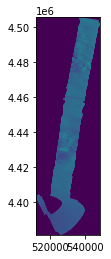

In [37]:
with rasterio.open('../output_data/rgb', 'r') as src:
    rplot.show(src)

There is our raster!  A special one we made ourselves.  😄